This tutorial is aim to demonstrate how to train ML model and visualization of the result based on *related set a* of the database. The generation of descriptor can be checked at tutorial **01-generate_descriptors.ipynb**

# Load dependence

In [1]:
import numpy as np
import os
from sklearn.ensemble import ExtraTreesRegressor
from mlutils import drawregfig
%matplotlib notebook

# Download the preprocessed file

Because of the data size limitation at the GitHub, we store our preprocessed descriptor file in our service.

In [3]:
if not os.path.exists('./data/screening_desc_ensemble.zip'):
    # download file and unzip the file that contain descriptor and target
    ! wget http://asymcatml.net/download/desc_ensemble_target.zip
    ! unzip ./desc_ensemble_target.zip
    ! mv ./desc_ensemble_target.zip ./data
    ! mv ./screening_desc_ensemble.npz ./data
    ! mv ./target.npz ./data

In [19]:
n_jobs = ! cat /proc/cpuinfo | grep "processor" | sort | uniq | wc -l
n_jobs = eval(n_jobs[0])
print('max available CPU thread is: %d, we will use the max thread defaultly'%n_jobs)

max available CPU thread is: 16, we will use the max thread defaultly


# Train Extra-Trees model for demonstration

Load descriptors and targets, then train a Extra-Trees model with *train_x*,*train_y* and predict with *test_x*. For saving time, here we just use MF+MBTR descriptor for demonstration.

In [20]:
desc_set = np.load('./data/screening_desc_ensemble.npz')
target = np.load('./data/target.npz')
train_x,test_x = desc_set['train_mf_mbtr_desc'],desc_set['test_mf_mbtr_desc']
train_y,test_y = target['train_y'],target['test_y']

model = ExtraTreesRegressor(n_jobs=n_jobs)
model.fit(train_x,train_y)
train_pred = model.predict(train_x)
test_pred = model.predict(test_x)

<IPython.core.display.Javascript object>


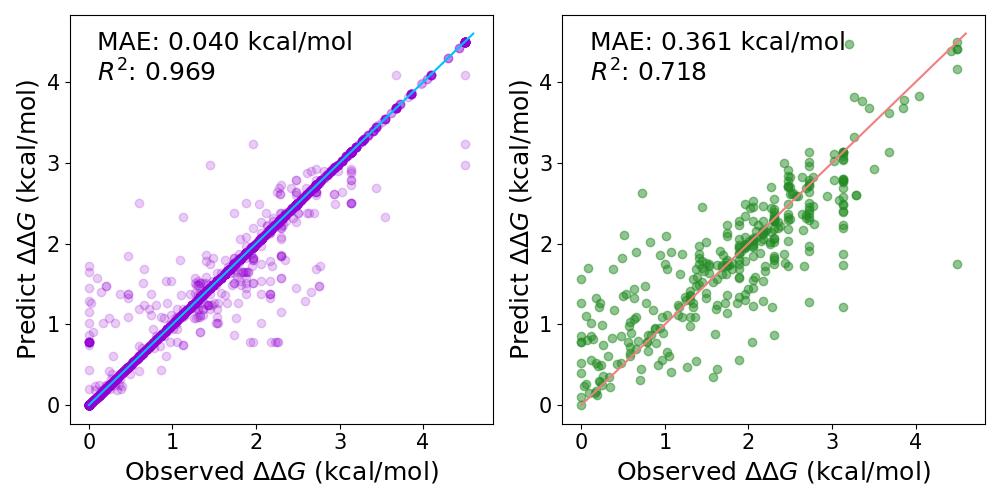

In [21]:
drawregfig(train_y,train_pred,test_y,test_pred,tag_scale=1,figsave_path=None)